# Visualization of data from API " Kartverket for administrative enheter"

In this notebook we will get data from the open API https://data.norge.no/dataservices/41e77491-1562-3eda-a006-f56a3064d274. The API contains data about administrative units such as counties (fylker) and municipalities (kommuner). For this API we don't need any API-key for authorization, this makes the GET-request easy. 

I have chosen to do this in Python because I have never worked with API in this language. My goal is to get som data from the API and then viualize it in both text and plots. 

### Postman
First I think it's easy to check how the API looks like using Postman. Where I can find the API also has a good overview where you can try the requests, but I'm used to Postman so I have used both. 

Bellow is a printscreen from Postman, and I have also added the flie to the GitHub repo.

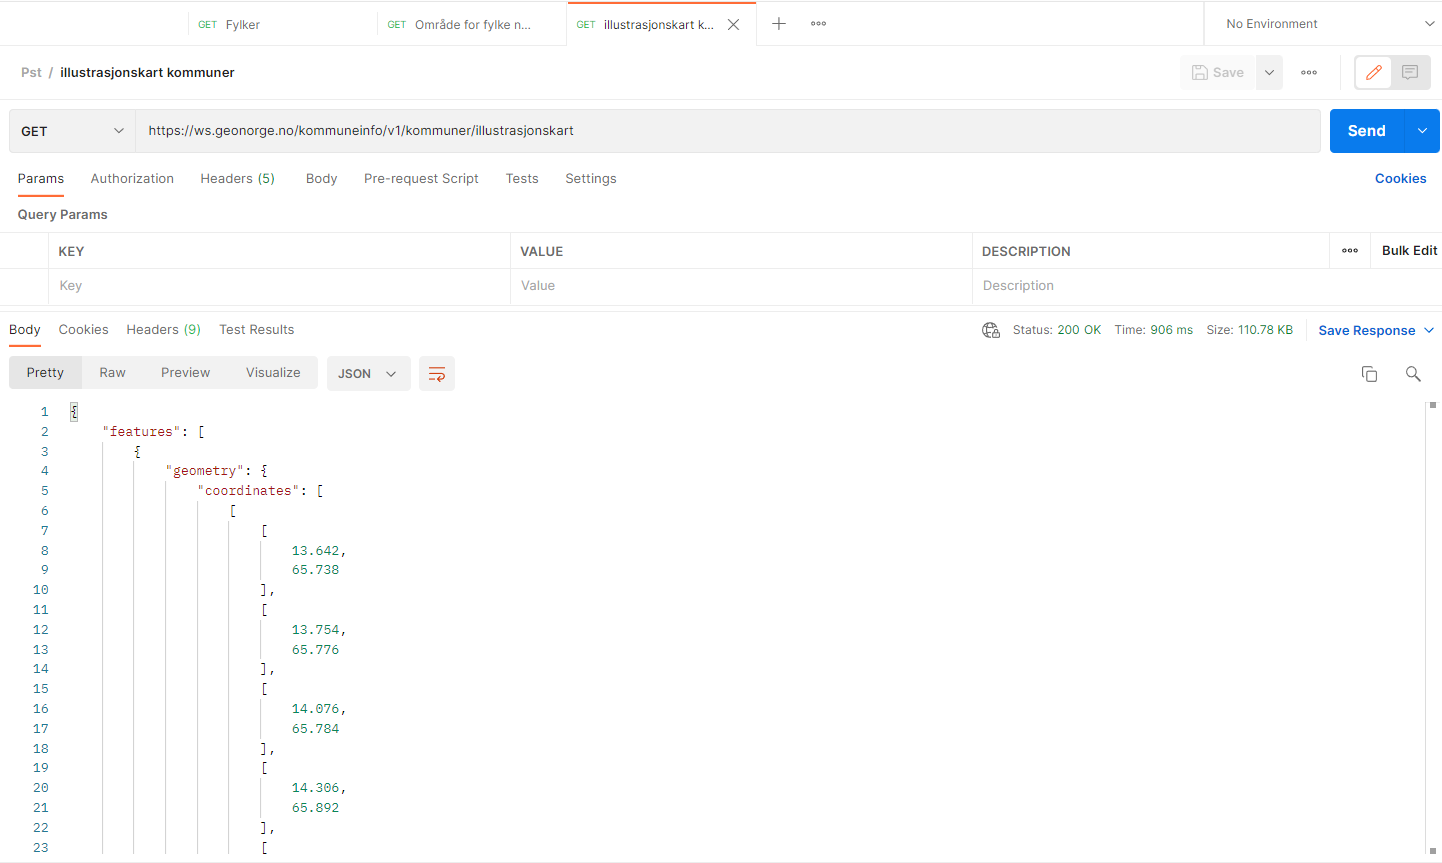

### Overview API

Looking at the API on the website https://ws.geonorge.no/kommuneinfo/v1/#/, we can see that this API only approve GET requests, so this is what I'm going to work with. Printscreen from the website is shown bellow. 

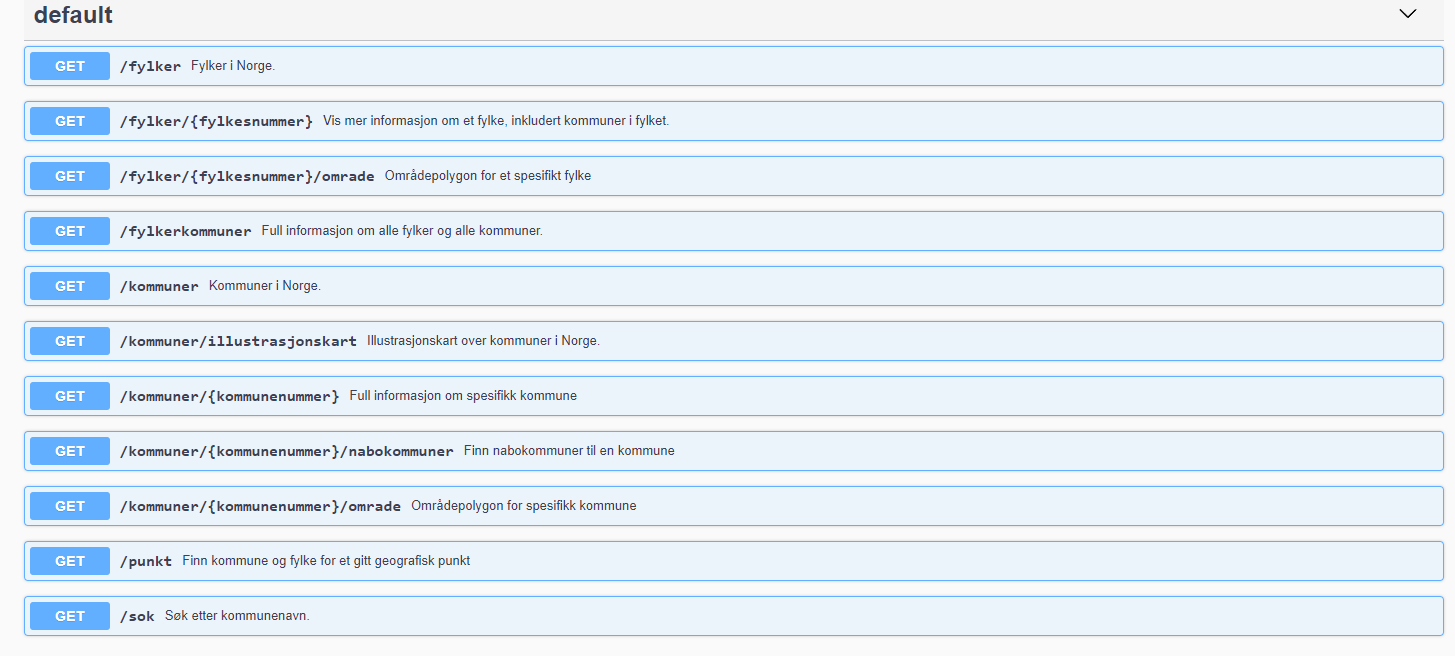

#### Import libaries

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

## GET request - /fylker
First I want to see what kind of "fylker" we got in the data. Here I'm doing a GET request to the endpoint with "fylker" as path. I have also added a simple check if we get the right response code, which is 200 - OK.

In [2]:
response = requests.get("https://ws.geonorge.no/kommuneinfo/v1/fylker")

if (response.status_code == 200):
    print('Response code = ' + str(response.status_code) + '. OK')
elif (response.status_code == 404):
    print('Response code = ' + str(response.status_code) + '. NOT FOUND')
else:
    print('Response code = ' + str(response.status_code))

Response code = 200. OK


#### Save data
Now I'm saving the response body to the varible "data". I'm using json libary, then we will get a list and not a dict. This will be easier to work with later.

In [3]:
data = json.loads(response.text)
data

[{'fylkesnavn': 'Oslo', 'fylkesnummer': '03'},
 {'fylkesnavn': 'Rogaland', 'fylkesnummer': '11'},
 {'fylkesnavn': 'Møre og Romsdal', 'fylkesnummer': '15'},
 {'fylkesnavn': 'Nordland', 'fylkesnummer': '18'},
 {'fylkesnavn': 'Viken', 'fylkesnummer': '30'},
 {'fylkesnavn': 'Innlandet', 'fylkesnummer': '34'},
 {'fylkesnavn': 'Vestfold og Telemark', 'fylkesnummer': '38'},
 {'fylkesnavn': 'Agder', 'fylkesnummer': '42'},
 {'fylkesnavn': 'Vestland', 'fylkesnummer': '46'},
 {'fylkesnavn': 'Trøndelag', 'fylkesnummer': '50'},
 {'fylkesnavn': 'Troms og Finnmark', 'fylkesnummer': '54'}]

As we can see we got 11 diffrent "fylker". We can also see that we have a list of dict's, just to be sure I'm going to check this by code.

In [4]:
type(data)

list

In [5]:
len(data)

11

In [6]:
fylke = data[0]
fylke

{'fylkesnavn': 'Oslo', 'fylkesnummer': '03'}

In [7]:
type(fylke)

dict

In [8]:
len(fylke)

2

#### Get all the numbers for each "fylke"
Next step is to make a GET request using the number of each "fylke". So first Iæm creating a empty list, then fill it with the numbers I got from the last response.

In [9]:
fylkesnummer = []
for i in range(len(data)):
    nr = data[i].get('fylkesnummer')
    fylkesnummer.append(nr)

In [10]:
# Print the numbers
fylkesnummer

['03', '11', '15', '18', '30', '34', '38', '42', '46', '50', '54']

## GET request - /fylker/{fylkesnummer}/omrade
Now to get the data of the area for each "fylke" I'm going to do a GET request for each "fylke" with the number in the path. I'm doing this in a loop and adding each response to a empty list.

In [11]:
responses_flykesnummer = []

for i in range(len(fylkesnummer)):
    
    response = requests.get('https://ws.geonorge.no/kommuneinfo/v1/fylker/' + fylkesnummer[i] + '/omrade')
    
    if (response.status_code != 200):
        break
    
    data = json.loads(response.text)
    responses_flykesnummer.append(data)

#### Check how the list looks

In [12]:
responses_flykesnummer

[{'fylkesnavn': 'Oslo',
  'fylkesnummer': '03',
  'omrade': {'coordinates': [[[[10.6181762159797, 59.9705121279099],
      [10.6205166449905, 59.9663404749638],
      [10.6220405917739, 59.9655787478006],
      [10.6234691342926, 59.9650756046091],
      [10.6236803446462, 59.9649607734553],
      [10.6241102244669, 59.9649162420677],
      [10.6244418419784, 59.9648267210262],
      [10.6244603414937, 59.9645305857486],
      [10.6244075765667, 59.9642702114323],
      [10.6241758970954, 59.9638572282625],
      [10.6238460903617, 59.9634621172057],
      [10.6234350827261, 59.963197035727],
      [10.6232926459429, 59.9629231605463],
      [10.6235708759889, 59.962667486955],
      [10.6243407419948, 59.9625117727626],
      [10.6253261132849, 59.9623143819272],
      [10.6259888749315, 59.9621398146762],
      [10.626455070851, 59.9618620502924],
      [10.626625549927, 59.9617050373179],
      [10.6268346883646, 59.9617414751417],
      [10.6272252152207, 59.9617324970586],
      [

#### Try to print some data from the list of responses

In [13]:
for i in range(len(responses_flykesnummer)):
    name = responses_flykesnummer[i].get("fylkesnavn")
    print(name)

Oslo
Rogaland
Møre og Romsdal
Nordland
Viken
Innlandet
Vestfold og Telemark
Agder
Vestland
Trøndelag
Troms og Finnmark


## Structure data from responses
I want to plot all "fylker" using the coordinates I got from the response. To do this I first want to get the data I need and make a structure by placing it in list and dict. I'm filling these in a loop than will loop for each element in the list of responses, that is the same as the amount of "fylker".

In [14]:
# Create empty list and dict 
names = []
corr_dict = {}

for i in range(len(responses_flykesnummer)):
    # Get and add name
    name = responses_flykesnummer[i].get("fylkesnavn")
    names.append(name)
    
    # Get and add coordinates, the name will be the key. Also chaning to 2D-array
    corr_dict[name] = responses_flykesnummer[i].get("omrade").get("coordinates")[0][0] 
    
    

#### Check how the data looks

In [15]:
names

['Oslo',
 'Rogaland',
 'Møre og Romsdal',
 'Nordland',
 'Viken',
 'Innlandet',
 'Vestfold og Telemark',
 'Agder',
 'Vestland',
 'Trøndelag',
 'Troms og Finnmark']

In [16]:
corr_dict

{'Oslo': [[10.6181762159797, 59.9705121279099],
  [10.6205166449905, 59.9663404749638],
  [10.6220405917739, 59.9655787478006],
  [10.6234691342926, 59.9650756046091],
  [10.6236803446462, 59.9649607734553],
  [10.6241102244669, 59.9649162420677],
  [10.6244418419784, 59.9648267210262],
  [10.6244603414937, 59.9645305857486],
  [10.6244075765667, 59.9642702114323],
  [10.6241758970954, 59.9638572282625],
  [10.6238460903617, 59.9634621172057],
  [10.6234350827261, 59.963197035727],
  [10.6232926459429, 59.9629231605463],
  [10.6235708759889, 59.962667486955],
  [10.6243407419948, 59.9625117727626],
  [10.6253261132849, 59.9623143819272],
  [10.6259888749315, 59.9621398146762],
  [10.626455070851, 59.9618620502924],
  [10.626625549927, 59.9617050373179],
  [10.6268346883646, 59.9617414751417],
  [10.6272252152207, 59.9617324970586],
  [10.6275788782829, 59.9616359672839],
  [10.6278450226244, 59.9614348280162],
  [10.6279406316518, 59.9613626448322],
  [10.6279555604034, 59.961302531538

In [17]:
corr_dict.get(names[0])

[[10.6181762159797, 59.9705121279099],
 [10.6205166449905, 59.9663404749638],
 [10.6220405917739, 59.9655787478006],
 [10.6234691342926, 59.9650756046091],
 [10.6236803446462, 59.9649607734553],
 [10.6241102244669, 59.9649162420677],
 [10.6244418419784, 59.9648267210262],
 [10.6244603414937, 59.9645305857486],
 [10.6244075765667, 59.9642702114323],
 [10.6241758970954, 59.9638572282625],
 [10.6238460903617, 59.9634621172057],
 [10.6234350827261, 59.963197035727],
 [10.6232926459429, 59.9629231605463],
 [10.6235708759889, 59.962667486955],
 [10.6243407419948, 59.9625117727626],
 [10.6253261132849, 59.9623143819272],
 [10.6259888749315, 59.9621398146762],
 [10.626455070851, 59.9618620502924],
 [10.626625549927, 59.9617050373179],
 [10.6268346883646, 59.9617414751417],
 [10.6272252152207, 59.9617324970586],
 [10.6275788782829, 59.9616359672839],
 [10.6278450226244, 59.9614348280162],
 [10.6279406316518, 59.9613626448322],
 [10.6279555604034, 59.9613025315383],
 [10.6280187109122, 59.961045

#### Check that the length of the coordinates array is correct

In [18]:
# From response
len(responses_flykesnummer[0].get("omrade").get("coordinates")[0][0])

5789

In [19]:
# From dict
len(corr_dict.get(names[0]))

5789

## Split coordinates
To make the values ready to plot I want to split the X and Y coordinates, and this I have to do for each fylke. To make it easy to plot all the data in the same plot I will make on dict for X coordinates and onw for Y coordinates. Each dict will have the name of each "fylke" as key and the value will be a list of the coordinates for the spesific "fylke".

In [20]:
# Create empty dict
x_dict = {}
y_dict = {}

for n in range(len(names)):
    # List to append coordinates. This will be empty for each itteration in the loop
    x_corr = []
    y_corr = []
    
    # Nested loop to itterate throgh the 2D array of coordinates
    for x in range(len(corr_dict.get(names[n]))):
        
        for y in range(len(corr_dict.get(names[n])[x])):
            
            x_corr.append(corr_dict.get(names[n])[x][0]) # X is always in 0 index
            y_corr.append(corr_dict.get(names[n])[x][1]) # Y is always in 0 index
    
    # Add coordinates to dict
    x_dict[names[n]] = x_corr
    y_dict[names[n]] = y_corr


#### Check how the data looks

In [21]:
x_dict

{'Oslo': [10.6181762159797,
  10.6181762159797,
  10.6205166449905,
  10.6205166449905,
  10.6220405917739,
  10.6220405917739,
  10.6234691342926,
  10.6234691342926,
  10.6236803446462,
  10.6236803446462,
  10.6241102244669,
  10.6241102244669,
  10.6244418419784,
  10.6244418419784,
  10.6244603414937,
  10.6244603414937,
  10.6244075765667,
  10.6244075765667,
  10.6241758970954,
  10.6241758970954,
  10.6238460903617,
  10.6238460903617,
  10.6234350827261,
  10.6234350827261,
  10.6232926459429,
  10.6232926459429,
  10.6235708759889,
  10.6235708759889,
  10.6243407419948,
  10.6243407419948,
  10.6253261132849,
  10.6253261132849,
  10.6259888749315,
  10.6259888749315,
  10.626455070851,
  10.626455070851,
  10.626625549927,
  10.626625549927,
  10.6268346883646,
  10.6268346883646,
  10.6272252152207,
  10.6272252152207,
  10.6275788782829,
  10.6275788782829,
  10.6278450226244,
  10.6278450226244,
  10.6279406316518,
  10.6279406316518,
  10.6279555604034,
  10.62795556040

In [22]:
y_dict

{'Oslo': [59.9705121279099,
  59.9705121279099,
  59.9663404749638,
  59.9663404749638,
  59.9655787478006,
  59.9655787478006,
  59.9650756046091,
  59.9650756046091,
  59.9649607734553,
  59.9649607734553,
  59.9649162420677,
  59.9649162420677,
  59.9648267210262,
  59.9648267210262,
  59.9645305857486,
  59.9645305857486,
  59.9642702114323,
  59.9642702114323,
  59.9638572282625,
  59.9638572282625,
  59.9634621172057,
  59.9634621172057,
  59.963197035727,
  59.963197035727,
  59.9629231605463,
  59.9629231605463,
  59.962667486955,
  59.962667486955,
  59.9625117727626,
  59.9625117727626,
  59.9623143819272,
  59.9623143819272,
  59.9621398146762,
  59.9621398146762,
  59.9618620502924,
  59.9618620502924,
  59.9617050373179,
  59.9617050373179,
  59.9617414751417,
  59.9617414751417,
  59.9617324970586,
  59.9617324970586,
  59.9616359672839,
  59.9616359672839,
  59.9614348280162,
  59.9614348280162,
  59.9613626448322,
  59.9613626448322,
  59.9613025315383,
  59.96130253153

#### Get one element from each dict

In [23]:
x_dict.get("Oslo")

[10.6181762159797,
 10.6181762159797,
 10.6205166449905,
 10.6205166449905,
 10.6220405917739,
 10.6220405917739,
 10.6234691342926,
 10.6234691342926,
 10.6236803446462,
 10.6236803446462,
 10.6241102244669,
 10.6241102244669,
 10.6244418419784,
 10.6244418419784,
 10.6244603414937,
 10.6244603414937,
 10.6244075765667,
 10.6244075765667,
 10.6241758970954,
 10.6241758970954,
 10.6238460903617,
 10.6238460903617,
 10.6234350827261,
 10.6234350827261,
 10.6232926459429,
 10.6232926459429,
 10.6235708759889,
 10.6235708759889,
 10.6243407419948,
 10.6243407419948,
 10.6253261132849,
 10.6253261132849,
 10.6259888749315,
 10.6259888749315,
 10.626455070851,
 10.626455070851,
 10.626625549927,
 10.626625549927,
 10.6268346883646,
 10.6268346883646,
 10.6272252152207,
 10.6272252152207,
 10.6275788782829,
 10.6275788782829,
 10.6278450226244,
 10.6278450226244,
 10.6279406316518,
 10.6279406316518,
 10.6279555604034,
 10.6279555604034,
 10.6280187109122,
 10.6280187109122,
 10.628016801275

In [24]:
y_dict.get("Oslo")

[59.9705121279099,
 59.9705121279099,
 59.9663404749638,
 59.9663404749638,
 59.9655787478006,
 59.9655787478006,
 59.9650756046091,
 59.9650756046091,
 59.9649607734553,
 59.9649607734553,
 59.9649162420677,
 59.9649162420677,
 59.9648267210262,
 59.9648267210262,
 59.9645305857486,
 59.9645305857486,
 59.9642702114323,
 59.9642702114323,
 59.9638572282625,
 59.9638572282625,
 59.9634621172057,
 59.9634621172057,
 59.963197035727,
 59.963197035727,
 59.9629231605463,
 59.9629231605463,
 59.962667486955,
 59.962667486955,
 59.9625117727626,
 59.9625117727626,
 59.9623143819272,
 59.9623143819272,
 59.9621398146762,
 59.9621398146762,
 59.9618620502924,
 59.9618620502924,
 59.9617050373179,
 59.9617050373179,
 59.9617414751417,
 59.9617414751417,
 59.9617324970586,
 59.9617324970586,
 59.9616359672839,
 59.9616359672839,
 59.9614348280162,
 59.9614348280162,
 59.9613626448322,
 59.9613626448322,
 59.9613025315383,
 59.9613025315383,
 59.9610455564397,
 59.9610455564397,
 59.960704051803

## Plot all counties
Here I will plot in a loop and for each iterration I will get the coordinates for that spesific countie by getting it from the dict using the name as a key.

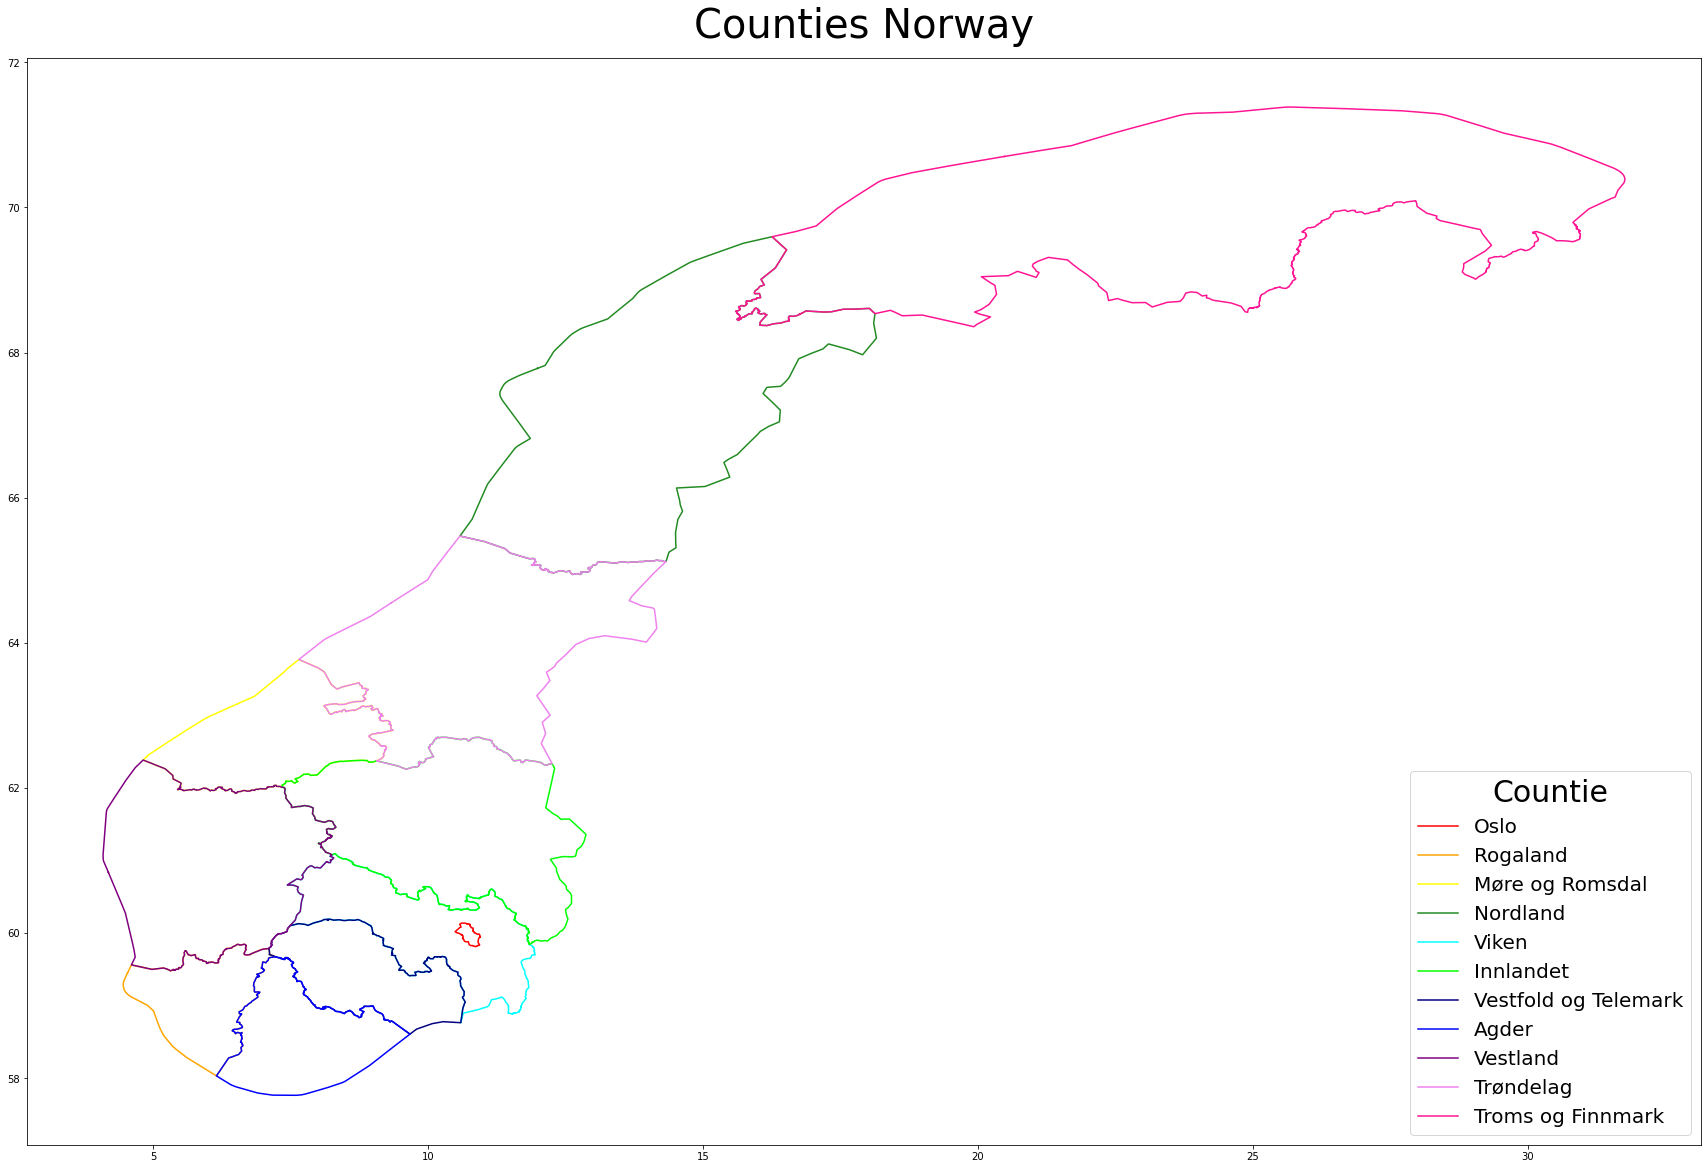

In [25]:
# Set up figure
fig = plt.figure(figsize=(30, 20))
# List of colors, one for each countie
colors = ['red', 'orange', 'yellow', 'forestgreen', 'cyan', 'lime', 'navy', 'blue', 'purple', 'violet', 'deeppink']

for n in range(len(names)):
    
    x = x_dict.get(names[n])
    y = y_dict.get(names[n])
    c = colors[n]
    
    plt.plot(x, y, color = c, label = names[n])

# Add legend and title to the plot
plt.legend(title = 'Countie', title_fontsize = 30, loc = 'lower right', prop = {'size': 20})
plt.title(label = 'Counties Norway', fontdict = {'fontsize': 40}, pad = 20.0)
plt.show()



## Result first plot
As we can see that the plot matches the globe and not a straight map. Some of the coordinates dose not match where it is many ilands and water. 

## GET request - /kommuner/Illustrasjonskart
Now I want to plot a choosen municipality from input. To get the coordinates of the municipality I'm using
'/kommuner/Illustrasjonskart' as path. 

In [26]:
response = requests.get("https://ws.geonorge.no/kommuneinfo/v1/kommuner/illustrasjonskart")

if (response.status_code == 200):
    print('Response code = ' + str(response.status_code) + '. OK')
elif (response.status_code == 404):
    print('Response code = ' + str(response.status_code) + '. NOT FOUND')
else:
    print('Response code = ' + str(response.status_code))

Response code = 200. OK


#### Check response
Here is where Postman is handy, there it's easier for me to see how the data looks and what kind of objects it contains.

In [27]:
data = json.loads(response.text)
data

{'features': [{'geometry': {'coordinates': [[[13.642, 65.738],
      [13.754, 65.776],
      [14.076, 65.784],
      [14.306, 65.892],
      [14.602, 65.862],
      [14.499, 65.521],
      [14.507, 65.31],
      [14.379, 65.248],
      [14.326, 65.119],
      [13.661, 65.108],
      [13.873, 65.257],
      [13.76, 65.316],
      [13.877, 65.487],
      [13.714, 65.523],
      [13.769, 65.555],
      [13.642, 65.738]]],
    'type': 'Polygon'},
   'properties': {'kommunenavn': 'Aarborte', 'kommunenummer': '1826'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[9.614, 64.075],
      [9.725, 64.274],
      [9.7, 64.396],
      [10.362, 64.299],
      [10.586, 64.164],
      [10.741, 64.177],
      [10.88, 64.098],
      [10.451, 63.771],
      [10.339, 63.866],
      [10.212, 63.852],
      [9.807, 63.917],
      [9.614, 64.075]]],
    'type': 'Polygon'},
   'properties': {'kommunenavn': 'Åfjord', 'kommunenummer': '5058'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[

#### Try to get data from the response

In [28]:
data.get('features')[0].get('properties').get('kommunenavn')

'Aarborte'

In [29]:
data.get('features')[0].get('properties').get('kommunenummer')

'1826'

In [30]:
data.get('features')[0].get('geometry').get('coordinates')[0]

[[13.642, 65.738],
 [13.754, 65.776],
 [14.076, 65.784],
 [14.306, 65.892],
 [14.602, 65.862],
 [14.499, 65.521],
 [14.507, 65.31],
 [14.379, 65.248],
 [14.326, 65.119],
 [13.661, 65.108],
 [13.873, 65.257],
 [13.76, 65.316],
 [13.877, 65.487],
 [13.714, 65.523],
 [13.769, 65.555],
 [13.642, 65.738]]

#### Get all names of the municipalities
Same approch as before.

In [31]:
map_names = []

for i in range(len(data.get('features'))):
    map_names.append(data.get('features')[i].get('properties').get('kommunenavn'))
    
map_names

['Aarborte',
 'Åfjord',
 'Ål',
 'Ålesund',
 'Alstahaug',
 'Alta',
 'Alvdal',
 'Alver',
 'Åmli',
 'Åmot',
 'Andøy',
 'Årdal',
 'Aremark',
 'Arendal',
 'Ås',
 'Åseral',
 'Asker',
 'Askøy',
 'Askvoll',
 'Åsnes',
 'Aukra',
 'Aure',
 'Aurland',
 'Aurskog-Høland',
 'Austevoll',
 'Austrheim',
 'Averøy',
 'Bærum',
 'Balsfjord',
 'Bamble',
 'Bardu',
 'Båtsfjord',
 'Beiarn',
 'Bergen',
 'Berlevåg',
 'Bindal',
 'Birkenes',
 'Bjerkreim',
 'Bjørnafjorden',
 'Bø',
 'Bodø',
 'Bokn',
 'Bømlo',
 'Bremanger',
 'Brønnøy',
 'Bygland',
 'Bykle',
 'Deatnu',
 'Dielddanuorri',
 'Dønna',
 'Dovre',
 'Drammen',
 'Drangedal',
 'Dyrøy',
 'Eidfjord',
 'Eidskog',
 'Eidsvoll',
 'Eigersund',
 'Elverum',
 'Enebakk',
 'Engerdal',
 'Etne',
 'Etnedal',
 'Evenes',
 'Evje og Hornnes',
 'Færder',
 'Farsund',
 'Fauske',
 'Fedje',
 'Fitjar',
 'Fjaler',
 'Fjord',
 'Flå',
 'Flakstad',
 'Flatanger',
 'Flekkefjord',
 'Flesberg',
 'Folldal',
 'Fredrikstad',
 'Frogn',
 'Froland',
 'Frosta',
 'Frøya',
 'Fyresdal',
 'Gáivuotna',
 'Gam

#### Make a dict of the names and the number for the municipality
This one we will use later when we are going to plot more than one municipality.

In [32]:
# map_names = []
kommune_nr = {}
for i in range(len(map_names)):

    kommune_nr[map_names[i]] = data.get('features')[i].get('properties').get('kommunenummer')
    
kommune_nr   

{'Aarborte': '1826',
 'Åfjord': '5058',
 'Ål': '3043',
 'Ålesund': '1507',
 'Alstahaug': '1820',
 'Alta': '5403',
 'Alvdal': '3428',
 'Alver': '4631',
 'Åmli': '4217',
 'Åmot': '3422',
 'Andøy': '1871',
 'Årdal': '4643',
 'Aremark': '3012',
 'Arendal': '4203',
 'Ås': '3021',
 'Åseral': '4224',
 'Asker': '3025',
 'Askøy': '4627',
 'Askvoll': '4645',
 'Åsnes': '3418',
 'Aukra': '1547',
 'Aure': '1576',
 'Aurland': '4641',
 'Aurskog-Høland': '3026',
 'Austevoll': '4625',
 'Austrheim': '4632',
 'Averøy': '1554',
 'Bærum': '3024',
 'Balsfjord': '5422',
 'Bamble': '3813',
 'Bardu': '5416',
 'Båtsfjord': '5443',
 'Beiarn': '1839',
 'Bergen': '4601',
 'Berlevåg': '5440',
 'Bindal': '1811',
 'Birkenes': '4216',
 'Bjerkreim': '1114',
 'Bjørnafjorden': '4624',
 'Bø': '1867',
 'Bodø': '1804',
 'Bokn': '1145',
 'Bømlo': '4613',
 'Bremanger': '4648',
 'Brønnøy': '1813',
 'Bygland': '4220',
 'Bykle': '4222',
 'Deatnu': '5441',
 'Dielddanuorri': '5412',
 'Dønna': '1827',
 'Dovre': '3431',
 'Drammen': 

#### Test that we get the number of the municipality in the dict

In [33]:
kommune_nr[map_names[4]]

'1820'

#### Get coordinates for each municipality
I will again use a dict to structure the data before I plot it. Here I will have map_dict that hase the name as key, the value will be a dict with two lists and the number for the municipality. This means that for example the key 'Ålesund' is pointing to a new dict that contais one list with X coordinates, one list with Y coordinates, and the number for 'Ålesund'.

A visulation of the structure is shown bellow.

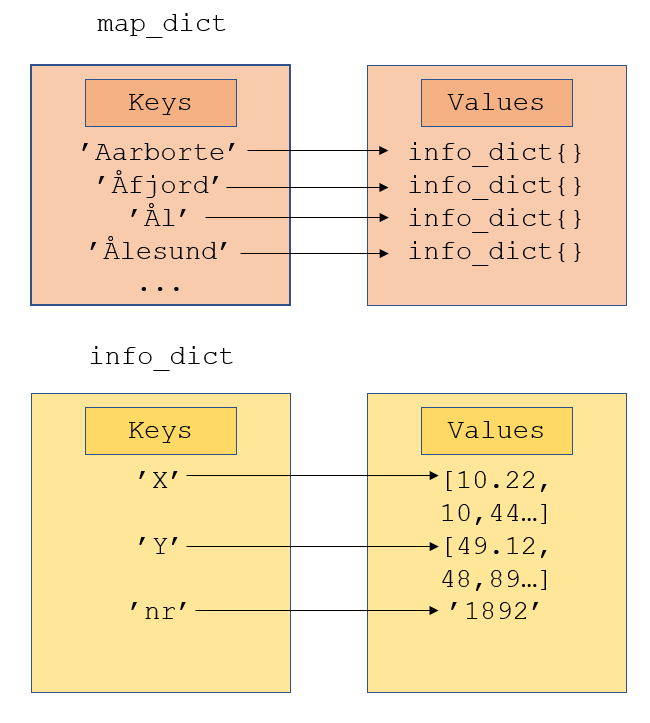

In [34]:
# Create empty map dict
map_dict = {}

for i in range(len(data.get('features'))):
    # Empty dict and lists that will be updated for each itteration
    info_dict = {}
    X = []
    Y = []
    
    # Get the coordinates for each municipality
    corr = data.get('features')[i].get('geometry').get('coordinates')[0]
    
    # Append the X and Y into the lists
    for x in range(len(corr)):
        for y in range(len(corr[x])):
            X.append(corr[x][0])
            Y.append(corr[x][1])
            
    # Add list to dict
    info_dict['X'] = X
    info_dict['Y'] = Y
    # Add 'kommunenummer' to dict
    info_dict['nr'] = kommune_nr[map_names[i]]
    # Add dict to dict
    map_dict[map_names[i]] = info_dict

#### Check the data

In [35]:
map_dict

{'Aarborte': {'X': [13.642,
   13.642,
   13.754,
   13.754,
   14.076,
   14.076,
   14.306,
   14.306,
   14.602,
   14.602,
   14.499,
   14.499,
   14.507,
   14.507,
   14.379,
   14.379,
   14.326,
   14.326,
   13.661,
   13.661,
   13.873,
   13.873,
   13.76,
   13.76,
   13.877,
   13.877,
   13.714,
   13.714,
   13.769,
   13.769,
   13.642,
   13.642],
  'Y': [65.738,
   65.738,
   65.776,
   65.776,
   65.784,
   65.784,
   65.892,
   65.892,
   65.862,
   65.862,
   65.521,
   65.521,
   65.31,
   65.31,
   65.248,
   65.248,
   65.119,
   65.119,
   65.108,
   65.108,
   65.257,
   65.257,
   65.316,
   65.316,
   65.487,
   65.487,
   65.523,
   65.523,
   65.555,
   65.555,
   65.738,
   65.738],
  'nr': '1826'},
 'Åfjord': {'X': [9.614,
   9.614,
   9.725,
   9.725,
   9.7,
   9.7,
   10.362,
   10.362,
   10.586,
   10.586,
   10.741,
   10.741,
   10.88,
   10.88,
   10.451,
   10.451,
   10.339,
   10.339,
   10.212,
   10.212,
   9.807,
   9.807,
   9.614,
   9.6

### Get input

In [36]:
print('Enter "kommunenavn":')
name = input()
print('Kommune: ' + name)

Enter "kommunenavn":
ålesund
Kommune: ålesund


#### Check if the name is inside the dict

In [37]:
if (name.capitalize() in map_dict):
    print('The municipality exist')
else:
    print('The municipality does not exist')

The municipality exist


#### Get the coordinates for the choosen municipality

In [38]:
to_plot = map_dict.get(name.capitalize()) # Make sure the key matches with uppercase one the first letter
to_plot

{'X': [5.641,
  5.641,
  6.338,
  6.338,
  6.707,
  6.707,
  6.577,
  6.577,
  6.447,
  6.447,
  6.677,
  6.677,
  7.116,
  7.116,
  6.89,
  6.89,
  6.692,
  6.692,
  6.363,
  6.363,
  6.055,
  6.055,
  6.191,
  6.191,
  6.181,
  6.181,
  5.641,
  5.641],
 'Y': [62.812,
  62.812,
  63.091,
  63.091,
  62.89,
  62.89,
  62.739,
  62.739,
  62.651,
  62.651,
  62.648,
  62.648,
  62.45,
  62.45,
  62.434,
  62.434,
  62.462,
  62.462,
  62.394,
  62.394,
  62.453,
  62.453,
  62.509,
  62.509,
  62.584,
  62.584,
  62.812,
  62.812],
 'nr': '1507'}

## Plot municipality
Same approch as last plot.

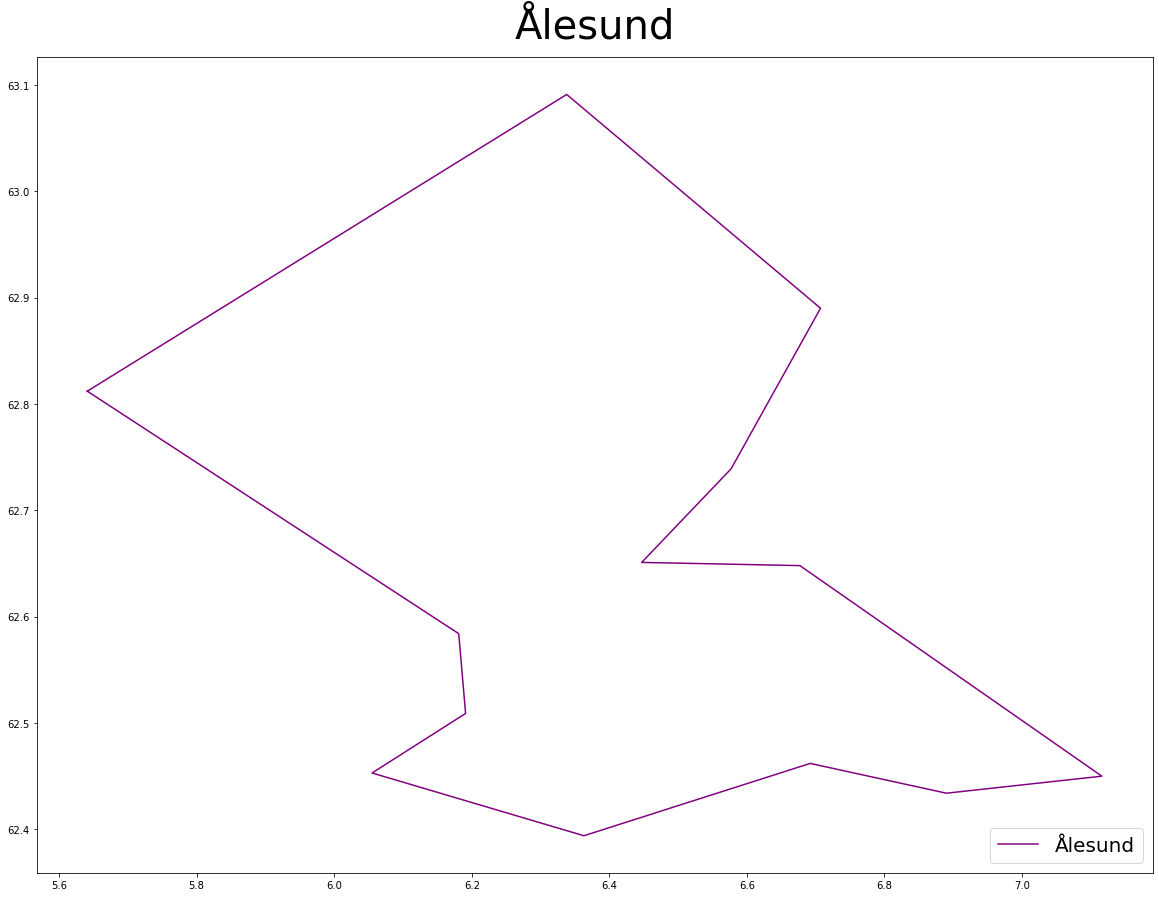

In [52]:
fig = plt.figure(figsize=(30, 20))

x = to_plot.get('X')
y = to_plot.get('Y')

plt.plot(x, y, color = c, label = name.capitalize())


plt.legend(loc = 'lower right', prop = {'size': 20})
plt.title(label = name.capitalize(), fontdict = {'fontsize': 40}, pad = 20.0)

plt.show()


## Plot municipality with the neighbor municipalities
Now we want to plot the choosen municipality togheter with the neighbor municipalities. To do this we will use the number for the municipality and find the neighbors.

#### Get the number of the municipality

In [40]:
m_nr = kommune_nr[name.capitalize()]
m_nr

'1507'

## GET request - /kommuner/{kommunenummer}/nabokommuner
I'm using '/kommuner/{kommunenummer}/nabokommunert' as path to get the neighbor municipalities.

In [41]:
response = requests.get('https://ws.geonorge.no/kommuneinfo/v1/kommuner/' + m_nr + '/nabokommuner')

if (response.status_code == 200):
    print('Response code = ' + str(response.status_code) + '. OK')
elif (response.status_code == 404):
    print('Response code = ' + str(response.status_code) + '. NOT FOUND')
else:
    print('Response code = ' + str(response.status_code))

Response code = 200. OK


#### Check the data

In [42]:
data = json.loads(response.text)
data

[{'kommunenavn': 'Molde',
  'kommunenavnNorsk': 'Molde',
  'kommunenummer': '1506'},
 {'kommunenavn': 'Ørsta',
  'kommunenavnNorsk': 'Ørsta',
  'kommunenummer': '1520'},
 {'kommunenavn': 'Sykkylven',
  'kommunenavnNorsk': 'Sykkylven',
  'kommunenummer': '1528'},
 {'kommunenavn': 'Sula', 'kommunenavnNorsk': 'Sula', 'kommunenummer': '1531'},
 {'kommunenavn': 'Giske',
  'kommunenavnNorsk': 'Giske',
  'kommunenummer': '1532'},
 {'kommunenavn': 'Vestnes',
  'kommunenavnNorsk': 'Vestnes',
  'kommunenummer': '1535'},
 {'kommunenavn': 'Aukra',
  'kommunenavnNorsk': 'Aukra',
  'kommunenummer': '1547'},
 {'kommunenavn': 'Fjord',
  'kommunenavnNorsk': 'Fjord',
  'kommunenummer': '1578'}]

#### Get the names of all the neighbors

In [43]:
neighbors = []
for i in range(len(data)):
    neighbors.append(data[i].get('kommunenavn'))

In [44]:
neighbors

['Molde', 'Ørsta', 'Sykkylven', 'Sula', 'Giske', 'Vestnes', 'Aukra', 'Fjord']

#### Make a new list that contains the neighbors and the choosen municipality

In [45]:
names_to_plot = neighbors
neighbors.append(name.capitalize())
names_to_plot

['Molde',
 'Ørsta',
 'Sykkylven',
 'Sula',
 'Giske',
 'Vestnes',
 'Aukra',
 'Fjord',
 'Ålesund']

#### Make a dict of all that contains the coordinates 

In [46]:
to_plot_dict = {}

for i in range(len(names_to_plot)):
    to_plot_dict[names_to_plot[i]] = map_dict.get(names_to_plot[i])

#### Check the dict

In [47]:
to_plot_dict

{'Molde': {'X': [6.577,
   6.577,
   7.047,
   7.047,
   7.43,
   7.43,
   8.139,
   8.139,
   8.324,
   8.324,
   8.206,
   8.206,
   8.291,
   8.291,
   8.218,
   8.218,
   8.732,
   8.732,
   8.206,
   8.206,
   8.026,
   8.026,
   8.08,
   8.08,
   7.825,
   7.825,
   7.732,
   7.732,
   7.352,
   7.352,
   7.002,
   7.002,
   6.677,
   6.677,
   6.447,
   6.447,
   6.577,
   6.577],
  'Y': [62.739,
   62.739,
   62.753,
   62.753,
   62.828,
   62.828,
   62.851,
   62.851,
   62.788,
   62.788,
   62.738,
   62.738,
   62.676,
   62.676,
   62.577,
   62.577,
   62.377,
   62.377,
   62.332,
   62.332,
   62.452,
   62.452,
   62.583,
   62.583,
   62.624,
   62.624,
   62.723,
   62.723,
   62.631,
   62.631,
   62.69,
   62.69,
   62.648,
   62.648,
   62.651,
   62.651,
   62.739,
   62.739],
  'nr': '1506'},
 'Ørsta': {'X': [5.922,
   5.922,
   5.967,
   5.967,
   6.167,
   6.167,
   6.363,
   6.363,
   6.705,
   6.705,
   6.784,
   6.784,
   6.714,
   6.714,
   6.571,
   6.5

#### Test to get data from the dict

In [49]:
to_plot_dict.get(names_to_plot[0])

{'X': [6.577,
  6.577,
  7.047,
  7.047,
  7.43,
  7.43,
  8.139,
  8.139,
  8.324,
  8.324,
  8.206,
  8.206,
  8.291,
  8.291,
  8.218,
  8.218,
  8.732,
  8.732,
  8.206,
  8.206,
  8.026,
  8.026,
  8.08,
  8.08,
  7.825,
  7.825,
  7.732,
  7.732,
  7.352,
  7.352,
  7.002,
  7.002,
  6.677,
  6.677,
  6.447,
  6.447,
  6.577,
  6.577],
 'Y': [62.739,
  62.739,
  62.753,
  62.753,
  62.828,
  62.828,
  62.851,
  62.851,
  62.788,
  62.788,
  62.738,
  62.738,
  62.676,
  62.676,
  62.577,
  62.577,
  62.377,
  62.377,
  62.332,
  62.332,
  62.452,
  62.452,
  62.583,
  62.583,
  62.624,
  62.624,
  62.723,
  62.723,
  62.631,
  62.631,
  62.69,
  62.69,
  62.648,
  62.648,
  62.651,
  62.651,
  62.739,
  62.739],
 'nr': '1506'}

In [50]:
to_plot_dict.get(names_to_plot[0]).get('X')

[6.577,
 6.577,
 7.047,
 7.047,
 7.43,
 7.43,
 8.139,
 8.139,
 8.324,
 8.324,
 8.206,
 8.206,
 8.291,
 8.291,
 8.218,
 8.218,
 8.732,
 8.732,
 8.206,
 8.206,
 8.026,
 8.026,
 8.08,
 8.08,
 7.825,
 7.825,
 7.732,
 7.732,
 7.352,
 7.352,
 7.002,
 7.002,
 6.677,
 6.677,
 6.447,
 6.447,
 6.577,
 6.577]

## Plot all the municipalities

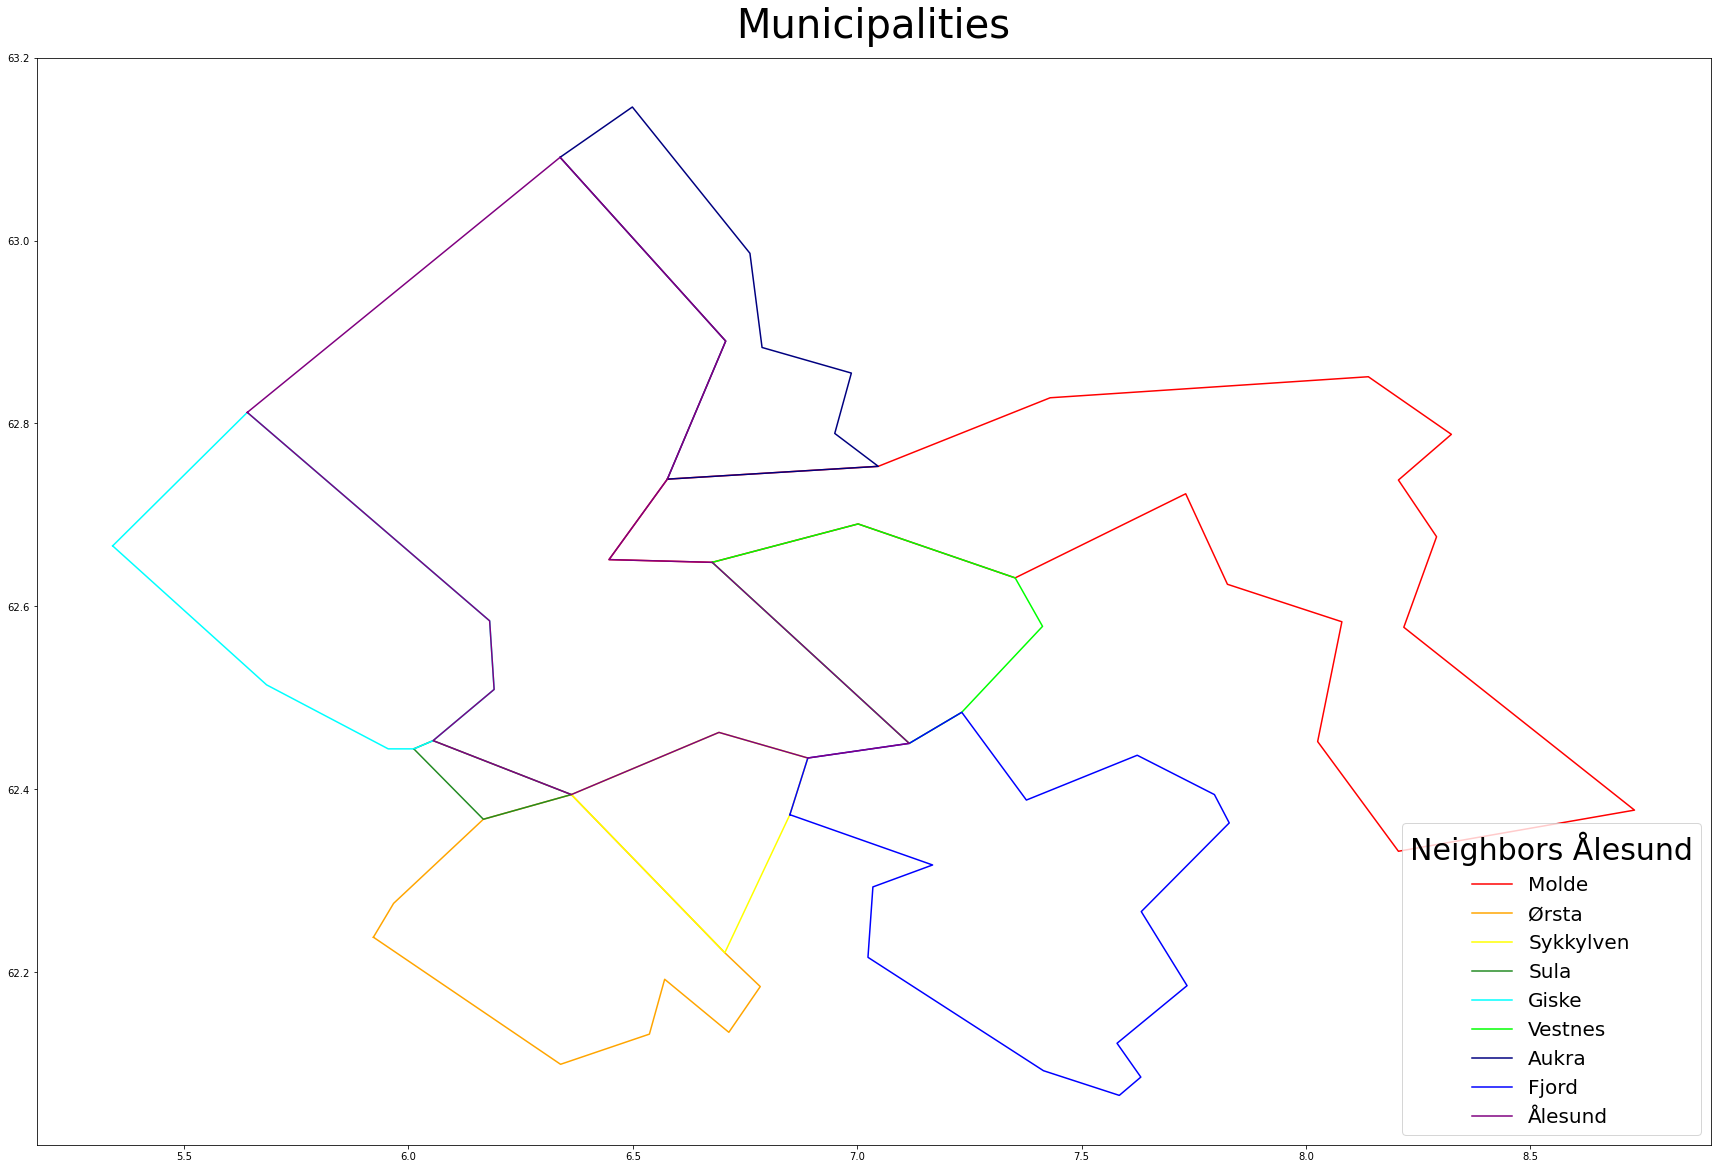

In [51]:
# Set up figure
fig = plt.figure(figsize=(30, 20))
# List of colors, one for each countie
colors = ['red', 'orange', 'yellow', 'forestgreen', 'cyan', 'lime', 'navy', 'blue', 'purple', 'violet', 'deeppink']

for n in range(len(names_to_plot)):
    
    x = to_plot_dict.get(names_to_plot[n]).get('X')
    y = to_plot_dict.get(names_to_plot[n]).get('Y')
    c = colors[n]
    
    plt.plot(x, y, color = c, label = names_to_plot[n])

# Add legend and title to the plot
plt.legend(title = 'Neighbors ' + names_to_plot[-1] , title_fontsize = 30, loc = 'lower right', prop = {'size': 20})
plt.title(label = 'Municipalities', fontdict = {'fontsize': 40}, pad = 20.0)
plt.show()

# Summary
This can be used in some application where you want to plot the diffrent counties in Norway. This will also be updated if the coordinates are changed. It possible to set up so it will draw new plow for each time the GET request is executed.

It's also possible to coninue and add more functions and plots.